<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/Digit-Recognition/blob/main/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

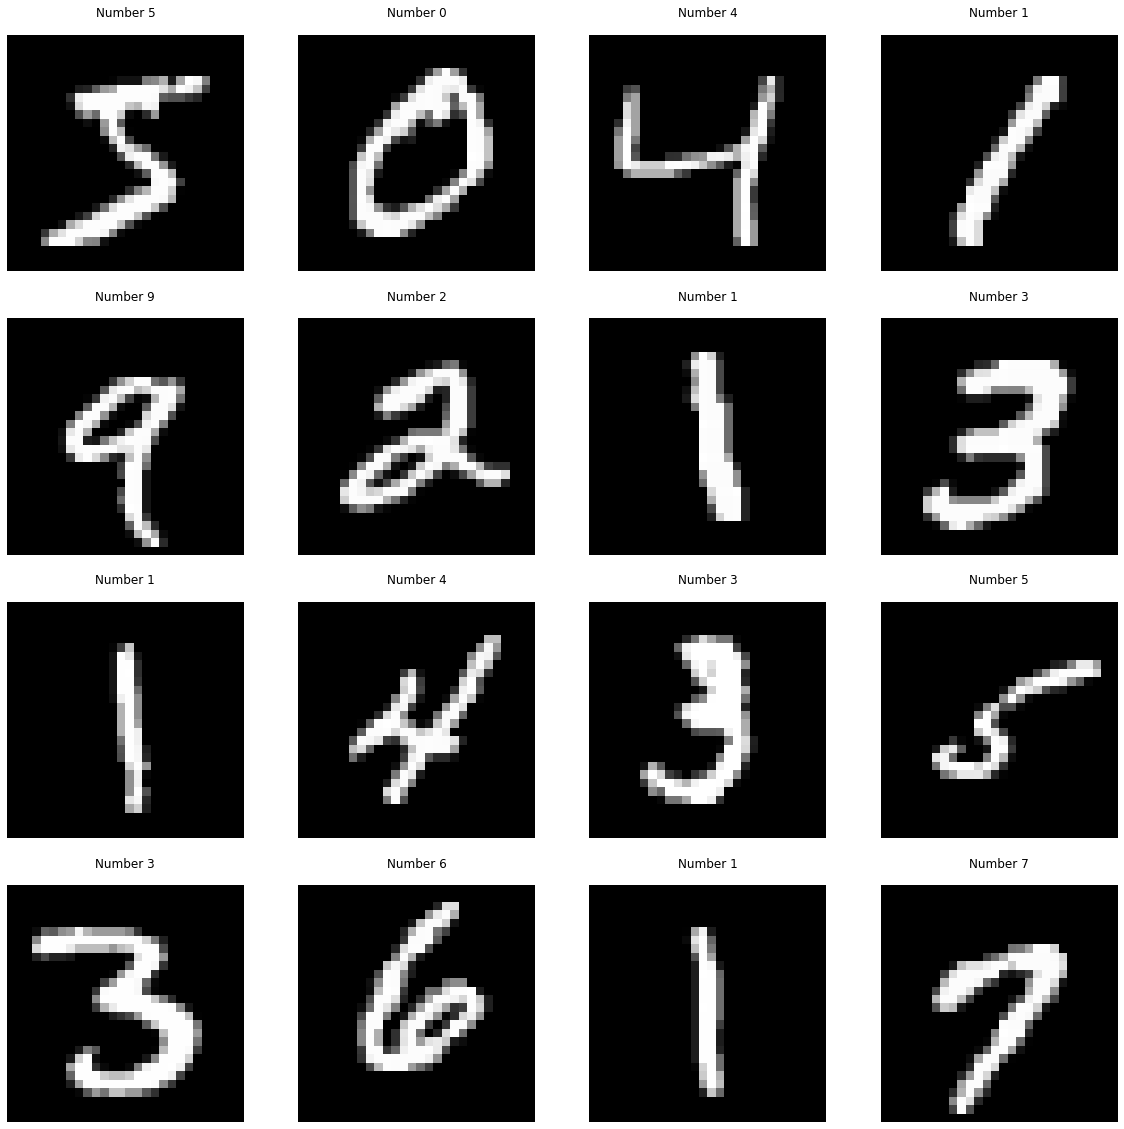

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()



In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2169 - accuracy: 0.9338
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0887 - accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0605 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0477 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0370 - accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0313 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0270 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0230 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0202 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 29s 15m

In [7]:
print(history)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [9]:
history.history['accuracy']
history.history['loss']

[0.21693839132785797,
 0.08872759342193604,
 0.060499824583530426,
 0.0477110780775547,
 0.03704579174518585,
 0.031331971287727356,
 0.02704552561044693,
 0.023029083386063576,
 0.02024739235639572,
 0.01945226453244686]

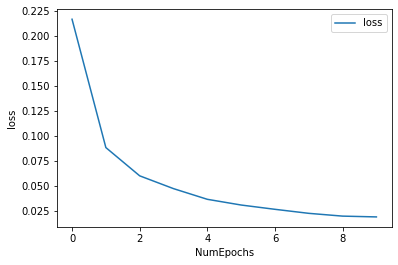

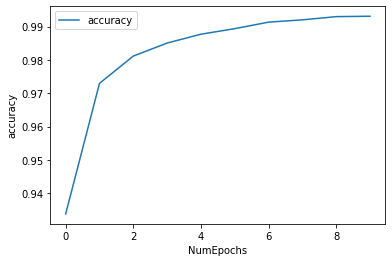

In [10]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, tempString])
  plt.show()
curvePlots('loss')
curvePlots('accuracy')

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0638 - accuracy: 0.9855


[0.06375647336244583, 0.9854999780654907]

In [12]:
print

<function print>

In [13]:
print(x_test[4000].shape)

(28, 28, 1)


In [18]:
pred=model.predict(np.expand_dims(x_test[3000],axis=0))
print(pred)
print(pred.argmax())
print(y_test[3000])

[[3.8463078e-12 1.1579016e-12 1.7084205e-12 5.1350348e-12 7.2513037e-12
  1.1924239e-05 9.9998808e-01 5.8331810e-19 2.1150774e-08 2.0931621e-18]]
6
6
